<a href="https://colab.research.google.com/github/kal-ops/Stock-Trading-Algorithm/blob/main/Machine_Learning_Pattern_Recognition_Stock_Trading_algorithm_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Pattern Recognition Algorithm for Stock Trading

In [91]:
#importing useful libraries
import yfinance as yf
import matplotlib
import pandas as pd

# Analysing Data

In [92]:
#reading the Data
data = pd.read_csv('ASIANPAINT_min2023.csv')

In [93]:
#Checking for null values
data.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
yyyymmdd,0
HHMM,0
date_time,0


In [94]:
#no null values

In [95]:
#Checking stastical Measures about the Data
data.describe()

,open,high,low,close,volume,yyyymmdd,HHMM
count,91930.000000,91930.000000,91930.000000,91930.000000,91930.000000,9.193000e+04,91930.000000
mean,3093.536236,3094.689268,3092.319681,3093.533186,2451.644545,2.023067e+07,1217.608942
std,212.441543,212.511262,212.365704,212.439641,4577.927063,3.438640e+02,182.000656
min,2686.050000,2688.200000,2685.850000,2686.450000,17.000000,2.023010e+07,915.000000
25%,2885.000000,2886.000000,2884.000000,2885.000000,717.000000,2.023033e+07,1048.000000
50%,3138.450000,3139.500000,3137.200000,3138.400000,1319.000000,2.023070e+07,1222.000000
75%,3258.000000,3259.100000,3256.737500,3258.000000,2666.000000,2.023093e+07,1356.000000
max,3565.000000,3568.000000,3563.600000,3565.600000,344635.000000,2.023123e+07,1914.000000


In [96]:
#we dont have bid/Ask so lets go with high/low per minute
High = list(data["high"])
Low = list(data["low"])
data

,date,open,high,low,close,volume,yyyymmdd,HHMM,date_time
0,2023-01-02 09:15:00+05:30,3087.90,3087.90,3055.00,3066.85,10515,20230102,915,20230102_0915
1,2023-01-02 09:16:00+05:30,3066.85,3073.45,3061.00,3063.95,5422,20230102,916,20230102_0916
2,2023-01-02 09:17:00+05:30,3060.00,3065.50,3058.00,3060.10,12176,20230102,917,20230102_0917
3,2023-01-02 09:18:00+05:30,3059.75,3063.55,3054.60,3059.95,9096,20230102,918,20230102_0918
4,2023-01-02 09:19:00+05:30,3060.00,3061.50,3051.85,3051.85,10073,20230102,919,20230102_0919
...,...,...,...,...,...,...,...,...,...
91925,2023-12-29 15:25:00+05:30,3403.75,3404.40,3402.45,3403.55,4219,20231229,1525,20231229_1525
91926,2023-12-29 15:26:00+05:30,3404.50,3405.00,3400.05,3403.65,4305,20231229,1526,20231229_1526
91927,2023-12-29 15:27:00+05:30,3403.65,3405.00,3402.10,3404.70,4546,20231229,1527,20231229_1527
91928,2023-12-29 15:28:00+05:30,3404.70,3404.70,3395.00,3398.10,1511,20231229,1528,20231229_1528


In [97]:
#formatting the date
data['date'] = pd.to_datetime(data['date']).dt.tz_localize(None)
data

,date,open,high,low,close,volume,yyyymmdd,HHMM,date_time
0,2023-01-02 09:15:00,3087.90,3087.90,3055.00,3066.85,10515,20230102,915,20230102_0915
1,2023-01-02 09:16:00,3066.85,3073.45,3061.00,3063.95,5422,20230102,916,20230102_0916
2,2023-01-02 09:17:00,3060.00,3065.50,3058.00,3060.10,12176,20230102,917,20230102_0917
3,2023-01-02 09:18:00,3059.75,3063.55,3054.60,3059.95,9096,20230102,918,20230102_0918
4,2023-01-02 09:19:00,3060.00,3061.50,3051.85,3051.85,10073,20230102,919,20230102_0919
...,...,...,...,...,...,...,...,...,...
91925,2023-12-29 15:25:00,3403.75,3404.40,3402.45,3403.55,4219,20231229,1525,20231229_1525
91926,2023-12-29 15:26:00,3404.50,3405.00,3400.05,3403.65,4305,20231229,1526,20231229_1526
91927,2023-12-29 15:27:00,3403.65,3405.00,3402.10,3404.70,4546,20231229,1527,20231229_1527
91928,2023-12-29 15:28:00,3404.70,3404.70,3395.00,3398.10,1511,20231229,1528,20231229_1528


In [98]:
import numpy as np

In [99]:
#making a separate date list
Date = data['date']
Date

,date
0,2023-01-02 09:15:00
1,2023-01-02 09:16:00
2,2023-01-02 09:17:00
3,2023-01-02 09:18:00
4,2023-01-02 09:19:00
...,...
91925,2023-12-29 15:25:00
91926,2023-12-29 15:26:00
91927,2023-12-29 15:27:00
91928,2023-12-29 15:28:00


# Plotting the Data

In [100]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

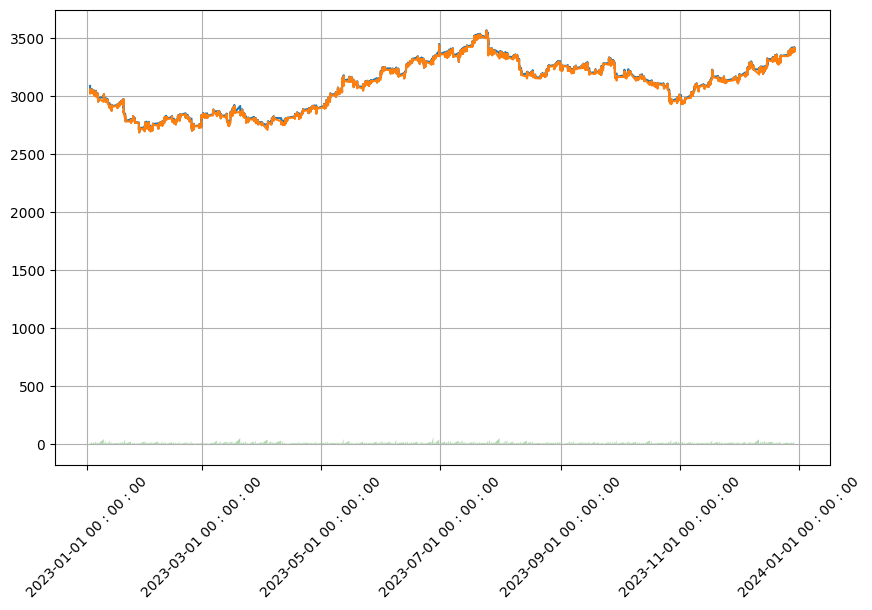

In [101]:
#Here we are just plotting the data to check what is going on
fig = plt.figure(figsize = (10,7))
axl = plt.subplot2grid((40,40), (0,0), rowspan = 40, colspan = 40)

axl.plot(Date, High)
axl.plot(Date, Low)

axl.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H : %M : %S'))

for labels in axl.xaxis.get_ticklabels():
  labels.set_rotation(45)

HighN = np.array(High)
LowN = np.array(Low)

ax2 = axl.twinx
axl.fill_between(Date, 0, (HighN - LowN), facecolor = 'g', alpha = 0.3 )

plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.subplots_adjust(bottom = 0.23)

plt.grid(True)
plt.show()

# Preparing the Data for Pattern Recognition

In [102]:
# Creating a pct_change function manually
def pct_change(start, current):
    try:
        # Sanitize inputs and convert to float
        start = safe_float(start)
        current = safe_float(current)

        # Avoid division by zero
        if abs(start) < 1e-15:  # Small threshold to detect near-zero values
            return 1e-15  # Return a small positive value

        # Calculate percentage change
        return ((current - start) / abs(start)) * 100

    except ZeroDivisionError:
        # Fallback for unexpected division by zero
        return ((current - 1e-15) / abs(1e-15)) * 100

# Helper function to safely convert to float
def safe_float(value):
    try:
        return float(value)
    except ValueError:
        return 0.0  # Return 0.0 for invalid strings like '.'


In [103]:
from functools import reduce
import time

In [104]:
#Making our storage centers for pattern and outcome
patternar = []
performacear = []

In [105]:
#find the time at the starting (we will subtract this from endtime to get time taken)
patstarttime = time.time()
#finding the average of high and low per minute
avgLine = ((HighN+LowN)/2)
#length of the array
x = len(avgLine)-60

#creating a counter
y = 31

#while the counter is less than length of the array,
while y < x:
#Now let us make a list to store the values below. We are making a 2 dimensional array so we need to make an array here and
#append it to another array above

  pattern = []

#each of the 10 numbers before y and y
  for i in range(29, -1, -1):
    pattern.append(pct_change(avgLine[y-30], avgLine[y-i]))

#here, our outcome range is the ten numbers after y+10, so y+20 to y+30
  outcomerange = avgLine[y+20:y+30]
#currentpoint is y
  currentpoint = float(avgLine[y])

  try:
#finding the average value of the ten values in the outcomerange since picking an individual value is stupid
    avgoutcome = reduce( lambda x,y: x+y, outcomerange) /len(outcomerange)
  except Exception as e:
    print(str(e))
    avgoutcome = 0

  futureoutcome = pct_change(currentpoint, avgoutcome)

#Now appending pattern to patternar to make a 2D array
  patternar.append(pattern)
  performacear.append(futureoutcome)

#Increasing y value
  y += 1
  endtime = time.time()

print(len(patternar))
print(len(performacear))

print("Time taken was", endtime - patstarttime)

91839
91839
Time taken was 3.6291801929473877


In [106]:
patforrec = patternar[-90]

In [107]:
patternar[-1]

[-0.0007372076050363354,
 -0.0051604532352409384,
 -0.00810928365537287,
 -0.008846491260409206,
 -0.011058114075504803,
 -0.007372076050336535,
 -0.013269736890613809,
 -0.007372076050336535,
 -0.011058114075504803,
 -0.020641812940950344,
 -0.03538596504162342,
 -0.020641812940950344,
 -0.019904605335914007,
 -0.040546418276850946,
 -0.04718128672216455,
 -0.056764985587596684,
 -0.04349524869699629,
 -0.05234173995740549,
 -0.056764985587596684,
 -0.056764985587596684,
 -0.055290570377524016,
 -0.055290570377524016,
 -0.056764985587596684,
 -0.07150913768826975,
 -0.06118823121780129,
 -0.05086732474733281,
 -0.04718128672216455,
 -0.046444079117128216,
 -0.03612317264665975,
 -0.020641812940950344]

In [108]:
#As we can see, patternar contains arrays of length 30

# Finding and plotting patterns

pattern for rec  [-0.011018069634200088, -0.027912443073301544, -0.008079917731749403, -0.037461436756282974, -0.13442044953723573, -0.16894373439106802, -0.13956221536653446, -0.1799618040252681, -0.22329954458645243, -0.2622300572939675, -0.22844131041575116, -0.24460114587923662, -0.2827971206111356, -0.30042603202586643, -0.2835316585867516, -0.2761862788306182, -0.24313206992801795, -0.23505215219626852, -0.26884089907448483, -0.3026296459527011, -0.32613486117231993, -0.34890553841633615, -0.3709416776847363, -0.3709416776847363, -0.376083443514035, -0.4333774056118701, -0.42897017775818747, -0.45761715880710496, -0.5215219626854708, -0.5354781842221216]
previous pattern [-0.09121463378557464, -0.26131759949380884, -0.28268318938951636, -0.35171047982185283, -0.35335398673691415, -0.31226631386051557, -0.36650204205734493, -0.34020593141645344, -0.3303448899261154, -0.328701383011069, -0.28843546359221606, -0.2720003944416626, -0.26871338061155486, -0.2547435718335785, -0.2941877

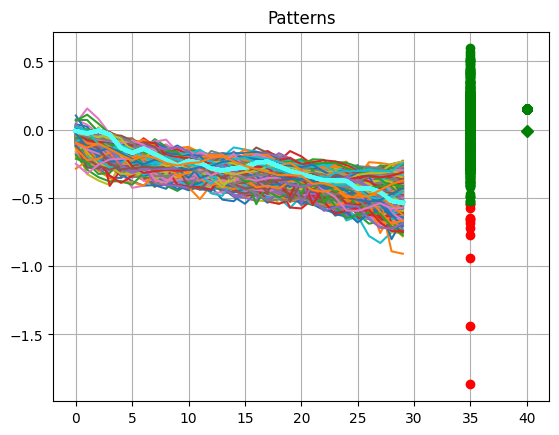

In [109]:
#let us store all the performances of previous patterns here
performanceoutcomes =[]

#eachpat is patterns in patternar
for eachpat in patternar:
#we are finding how similar they are by subtracting the percentage differences from 100 from each element in the list and
#then taking the average for each pattern
  sim = []
  for i in range(29, -1, -1):
    sim.append(100 - abs(pct_change(eachpat[i], patforrec[i])))

#finding the average similarity
  howsim = (sum(sim))/30.00

#we have this stopper here to remove the original pattern because my patforrec is in the original dataset
  stopper = howsim-100

#keeping a threshold of 85% similarity and printing all similar patterns and their outcomes
  if howsim > 70 and stopper < 0:
#patdex is the index of the detected pattern
    patdex = patternar.index(eachpat)

    print("pattern for rec ", patforrec)

    print("previous pattern", eachpat)

    print("outcome is ", performacear[patdex])
#perform is the outcome of the patternar that we will average out later
    perform = performacear[patdex]
#appending all the performs to performanceoutcomes
    performanceoutcomes.append(perform)
#patforrec index is the the index of the pattern to be recognized
    patforrecindex = patternar.index(patforrec)
#realperformance is the performance of the patforrec
    realperformance = performacear[patforrecindex]

    xp = list(np.arange(30))

    if perform > float(patforrec[29]):
      pcolor = "Green"

    else:
      pcolor = "Red"

    if realperformance > float(patforrec[29]):
      percolor = "Green"

    else:
      percolor = "Red"

    if realperformance > float(patforrec[29]):
      percolor = "Green"

    else:
      percolor = "Red"




    plt.plot(xp, patforrec, color = '#54fff7', linewidth = 3)
    plt.grid(True)
    plt.title("Patterns")
    plt.plot(xp, eachpat)
    plt.plot(35, perform , "o", color = pcolor, alpha = 1)

    plt.plot(40, realperformance, "o", color = percolor)


averagepredictedoutcome = reduce( lambda x,y: x+y, performanceoutcomes) /len(performanceoutcomes)
if averagepredictedoutcome > patforrec[29]:
    avgcolor = "Green"

else:
    avgcolor = "Red"

plt.plot(40, averagepredictedoutcome, "D", color = avgcolor)
plt.show()


In [72]:
#As we can see the recognition is quite accurate in some cases

# Forward Testing on 2024 data

In [73]:
#refining the data
df2024 = pd.read_csv("Asian paints 2024 stock data prepared")
df2024

,Unnamed: 0,patternar2024,performancear2024
0,0,"[-0.016898717901614724, -0.033062708937952316,...",-0.161948
1,1,"[-0.01616672300525218, 0.04629561587865604, -0...",-0.168406
2,2,"[0.06247243863001617, -0.0044098191974022115, ...",-0.165257
3,3,"[-0.06684050093649083, -0.04700870395533906, 0...",-0.173849
4,4,"[0.01984506151968269, 0.0690902141796479, 0.06...",-0.168656
...,...,...,...
14529,14529,"[0.01426007012598276, 0.008388276544701126, -0...",0.042440
14530,14530,"[-0.005870956378784952, -0.020967701352820837,...",0.037656
14531,14531,"[-0.015097631349386638, -0.019291417835329068,...",0.041430
14532,14532,"[-0.004194419743972618, -0.0033555357951750436...",0.041933


In [74]:
#making the lists
patar2024x = list(df2024["patternar2024"])
performar2024x = list(df2024["performancear2024"])
patar2024 = patar2024x[:1000]
performar2024 = performar2024x[:1000]

In [75]:
predictedaverageoutcome = []
realoutcome = []
updownpred = []
updownreal = []


# Add new patterns and calculate similarities
for patforrec1 in patar2024:
    patforrecdex = patar2024.index(patforrec1)
    performacear.append(performar2024[patforrecdex])
    print(patforrec1)

    performanceoutcomes = []  # Reset for each patforrec1

    for eachpat in patternar:
        sim = []
        for i in range(29, -1, -1):

            sim.append(100 - abs(pct_change(eachpat[i], patforrec1[i])))

        # Calculate average similarity
        howsim = sum(sim) / 30.0

        # Skip exact matches
        if howsim > 75 and not np.array_equal(eachpat, patforrec1):
            patdex = patternar.index(eachpat)

            print("Pattern for rec:", patforrec1)
            print("Previous pattern:", eachpat)
            print(f"Similarity score: {howsim}")
            print("Outcome is:", performacear[patdex])

            # Append to performance outcomes
            perform = performacear[patdex]
            performanceoutcomes.append(perform)

    # Append the pattern after all comparisons
    patternar.append(patforrec1)

    # Calculate average predicted outcome
    try:
        averageoutcomepreds = sum(performanceoutcomes) / len(performanceoutcomes)
        print(performanceoutcomes)
        predictedaverageoutcome.append(averageoutcomepreds)
        realoutcome.append(performar2024[patforrecdex])
        print(f"real outcome is: {performar2024[patforrecdex]}")
        print(f"predicted outcome is: {averageoutcomepreds}")

        if float(averageoutcomepreds) > float(patforrec1[29]):
          print("Rise Predicted")
          updownpred.append("Rise")
        else:
          print("Drop Predicted")
          updownpred.append("Drop")

        if float(performar2024[patforrecdex]) > float(patforrec1[29]):
          print("Rise Occured")
          updownreal.append("Rise")
        else:
          print("Drop Occured")
          updownreal.append("Drop")

    except (ValueError, ZeroDivisionError) as e:
      # Handle the error and skip processing for this iteration
      print(f"Error occurred: {e}")

Streaming output truncated to the last 5000 lines.
Pattern for rec: [-0.04871208207248036, -0.027308288434576188, -0.014761236991659902, -0.014023175142074221, -0.015499298841232157, -0.04354564912539402, -0.044283710974979705, -0.044283710974979705, -0.016975422540403518, -0.013285113292488542, -0.00073806184958568, -0.0036903092479149756, 0.012547051442916287, 0.016975422540403518, 0.03542696877997839, 0.03764115432873543, 0.036165030629577495, 0.06347331906414026, 0.06421138091372594, 0.06716362831205523, 0.08856742194995941, 0.12251826703077986, 0.1114473392870215, 0.13580338032326839, 0.14982655546534263, 0.16384973060743027, 0.147612369916599, 0.06937781386079885, 0.07454424680788518, 0.08044874160454378]
Previous pattern: [-0.030988076968486065, -0.0855861173415208, -0.11436076024082162, -0.11657419431000686, -0.11804981702278361, -0.10476921260771241, -0.1446110258529126, -0.17264785739581837, -0.15641600755519364, -0.1711722346830416, -0.2213434069177327, -0.2530692952426004, 

In [87]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(updownreal, updownpred)
print(f"The model is {accuracy*100.00}% accurate when forward tested on the first 1000 prices of 2024.")


The model is 92.85714285714286% accurate when forward tested on the first 1000 prices of 2024.


In [88]:
#THERE WE GO!!!